In [1]:
# Import Packages

import numpy as np
import pandas as pd
import json

In [2]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 9.8 MB/s 
     |████████████████████████████████| 6.3 MB 50.5 MB/s 
     |████████████████████████████████| 16.7 MB 42.5 MB/s 


In [3]:
import geopandas as gpd

In [4]:
import re

# Import Corpus

import nltk.corpus

In [5]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 7.7 MB/s 


In [6]:
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

from sklearn import cluster

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud

In [8]:
import folium
from branca.element import Figure

In [9]:
import os

In [10]:
# Mount Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
# Import Image Captions (previously downloaded as CSV in earlier file - using Sanjay M Methodology)

coffeedata = pd.read_csv('/content/gdrive/MyDrive/imgcaptions.csv', encoding='utf-8')

In [12]:
# View Example of Image Captions

coffeedata.head(6)

,Unnamed: 0,ImageCaptions
0,0,['a living room filled with furniture and a fi...
1,1,['a building that has graffiti on it']
2,2,['a large building with a clock on the front o...
3,3,['a skateboard with a knife sticking out of it']
4,4,['a large swimming pool in front of a large bu...
5,5,['a person holding a cup of coffee on top of a...


In [13]:
# Create corpus out of ALL image captions (1,038)

corpus = coffeedata['ImageCaptions'].tolist()

In [15]:
# Example of line "122" of corpus and character output

corpus[122][0:55]

"['a coffee cup sitting on top of a wooden table']"

In [16]:
# Source: Lucas De Sa National Anthem Clustering (Github, Medium)

def removeWords(listOfTokens, listOfWords):
  return [token for token in listOfTokens if token not in listOfWords]

In [17]:
def applyStemming(listOfTokens, stemmer):
  return [stemmer.stem(token) for token in listOfTokens]

In [18]:
def twoLetters(listOfTokens):
  twoLetterWord = []
  for token in listOfTokens:
    if len(token) <= 2 or len(token) >= 21:
      twoLetterWord.append(token)
  return twoLetterWord

In [19]:
from nltk.corpus import words

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)

    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].replace('coffee','')
        corpus[index] = corpus[index].replace('coff','')
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase

        corpus[index] = re.sub('\W_',' ', corpus[index])        # remove specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) 
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [23]:
# Corpus after stemming, removal of stopwords, etc.

language = 'english'
corpus = processCorpus(corpus, language)

In [24]:
# Example of corpus after this process

corpus[25][0:40]

'woman pink dress holding pink umbrella'

In [25]:
# TF/IDF process based on entire corpus

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
final_df = tf_idf

In [27]:
print("{} rows".format(final_df.shape[0]))

1038 rows


In [28]:
# Data Frame with TF/IDF per image caption

final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037
place,0.528120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
living,0.427910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
furniture,0.415026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fire,0.409310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.426257,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room,0.355850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
print(final_df)

      air  alarm  alcohol   an  animal  animals  apple  apples  appliances  \
0     0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   
1     0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   
2     0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   
3     0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   
4     0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   
...   ...    ...      ...  ...     ...      ...    ...     ...         ...   
1033  0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   
1034  0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   
1035  0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   
1036  0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   
1037  0.0    0.0      0.0  0.0     0.0      0.0    0.0     0.0         0.0   

          area  ...  wii  window  wine    woman  women  wood  w

In [30]:
# Save to CSV

final_df.to_csv('tfidf.csv')

In [31]:
!cp tfidf.csv "/content/gdrive/MyDrive"

In [32]:
# K-Means for Text Clustering

from sklearn.cluster import KMeans

In [34]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [35]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=100, random_state=22)

In [36]:
kmeans.fit(final_df)

KMeans(init='random', max_iter=100, n_clusters=5, random_state=22)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


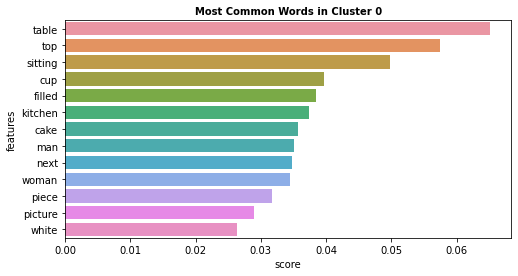

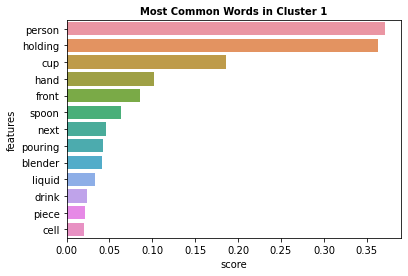

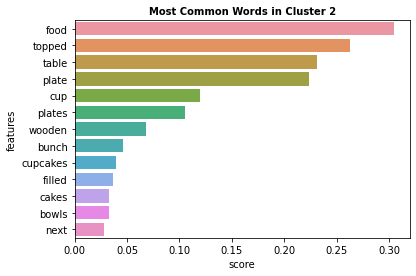

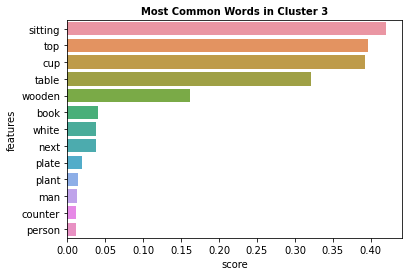

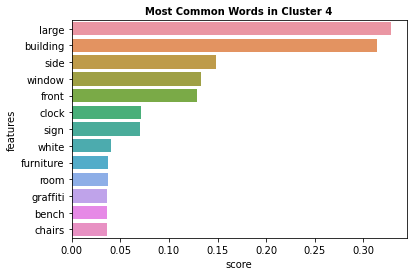

In [40]:
# Plot TF/IDF scores by cluster

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [38]:
# Find centroids for K-Means

def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict


# Word Cloud Methodology
def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

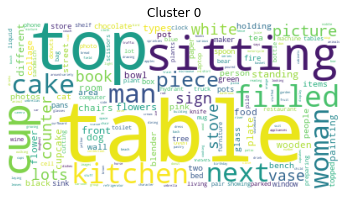

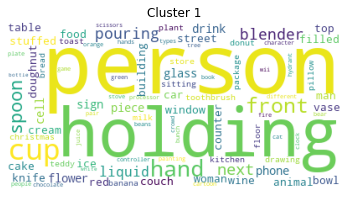

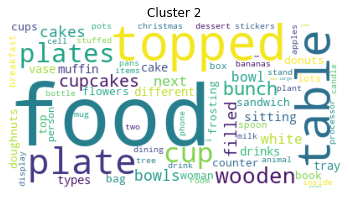

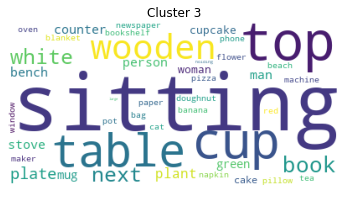

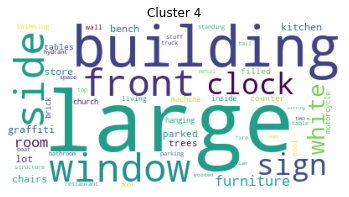

In [39]:
# Generate word clouds

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)